JN by Minne Schepers

For splitting the data into males and females, and into training and test group

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats

In [8]:
df = pd.read_csv('/Users/minneschepers/Downloads/HCP_Aging_cog.csv')

Split into females and females

In [9]:
males = df[df['sex']=='M']
males = females.reset_index()
females = df[df['sex']=='F']
females = females.reset_index()
print(females.shape)
print(females.shape)

(406, 42)
(406, 42)


# Females

Number of rows per column in females:

In [10]:
females.notnull().sum()

index                       406
subject                     406
sex                         406
age_months                  406
age_years                   406
moca_total_score            406
years_of_education          406
fluidcog_unadjusted         358
fluidcog_age                348
fluidcog_np                 328
crystalcog_unadjusted       358
crystalcog_age              348
crystalcog_np               328
earlychildcog_unadjusted    358
earlychildcog_age           348
earlychildcog_np            328
totalcog_unadjusted         358
totalcog_age                348
totalcog_np                 328
dccs_unadjusted             360
dccs_age                    350
dccs_np                     152
deldisc_auc200              403
deldisc_auc40000            403
flanker_unadjusted          360
flanker_age                 350
flanker_np                  152
lswmt_unadjusted            360
lswmt_age                   350
lswmt_np                    152
orrt_unadjusted             360
orrt_age

<AxesSubplot:>

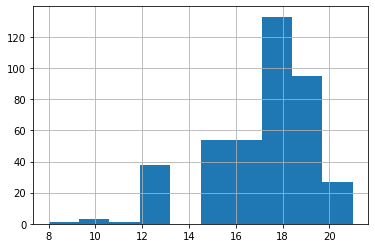

In [11]:
females['years_of_education'].hist()

<AxesSubplot:>

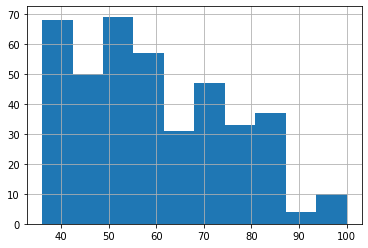

In [12]:
females['age_years'].hist()

Show correlation values between cognitive scores in females and age/education/moca scores

In [13]:
all_columns = females.columns
age_columns = [i for i in all_columns if '_age' in i]
standard_columns = ['subject', 'sex', 'age_months', 'age_years', 'moca_total_score',
       'years_of_education']

In [14]:
females_age = females[standard_columns + age_columns]

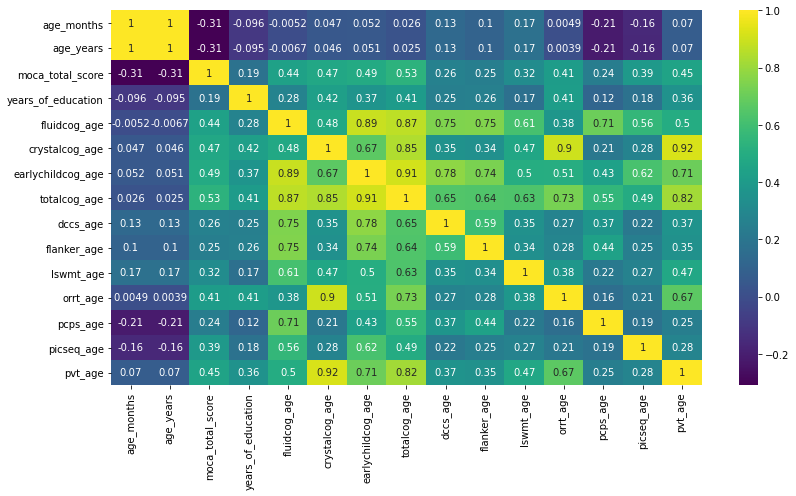

In [15]:
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(females_age.corr(), annot=True, cmap='viridis')
plt.tight_layout()

Split data into test part and training part

In [16]:
# Split on age_years:

# Organize data into 3 bins
bins = np.linspace(50, 100, 3)
print(bins)
y = females['age_years']
y_binned = np.digitize(y, bins)

[ 50.  75. 100.]


In [17]:
# Split on years_of_education

bins2 = np.linspace(16, 20, 3)
print(bins2)
y2 = females['years_of_education']
y_binned2 = np.digitize(y2, bins2)

[16. 18. 20.]


In [18]:
# Do not split on moca_total_score, because not enough data in dataset (insufficient nr of rows per group)

# bins3 = np.linspace(18, 30, 3)
# print(bins3)
# # Split on years_of_education
# y3 = females['moca_total_score']
# y_binned3 = np.digitize(y3, bins3)

In [19]:
y_stacked = np.vstack((y_binned, y_binned2))
y_stacked = y_stacked.T
y_stacked.shape

(406, 2)

In [20]:
# Perform split
females_train, females_test = train_test_split(females, stratify=y_binned, test_size=0.5)
print(females_train.shape)
print(females_train.shape)

(203, 42)
(203, 42)


Check nr non-nan values

In [21]:
non_nan_values = pd.DataFrame()
non_nan_values['train'] = females_train.notnull().sum()
non_nan_values['test'] = females_test.notnull().sum()
non_nan_values

,train,test
index,203,203
subject,203,203
sex,203,203
age_months,203,203
age_years,203,203
moca_total_score,203,203
years_of_education,203,203
fluidcog_unadjusted,182,176
fluidcog_age,175,173
fluidcog_np,165,163


Plot data for checking of distributions

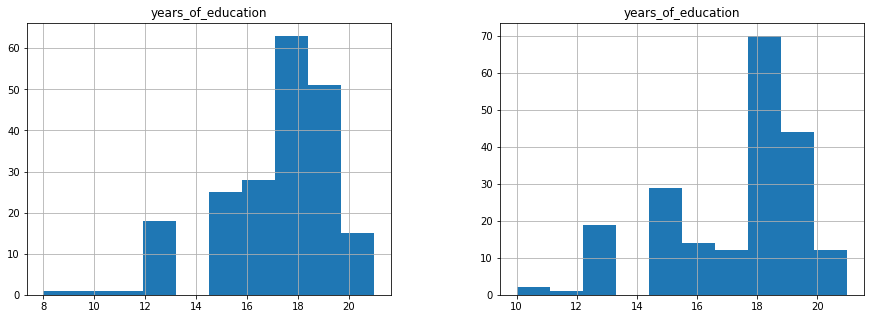

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
to_plot = 'years_of_education'
females_train.hist(to_plot, ax=axes[0])
females_test.hist(to_plot, ax=axes[1])
plt.show()

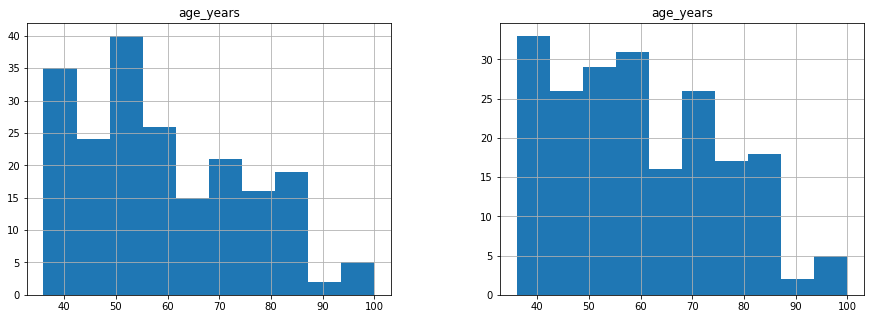

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
to_plot = 'age_years'
females_train.hist(to_plot, ax=axes[0])
females_test.hist(to_plot, ax=axes[1])
plt.show()

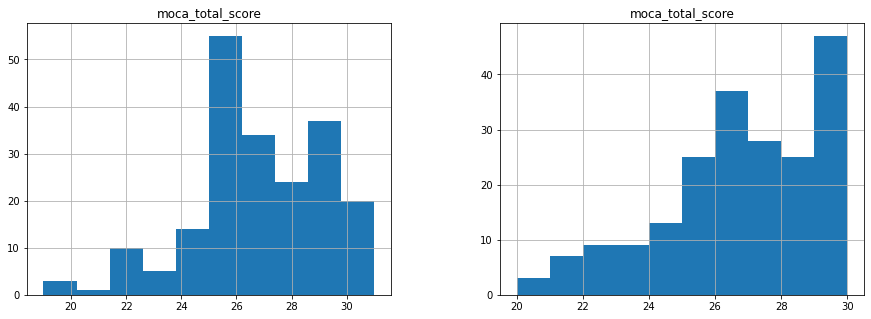

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
to_plot = 'moca_total_score'
females_train.hist(to_plot, ax=axes[0])
females_test.hist(to_plot, ax=axes[1])
plt.show()

In [25]:
# Test for significant differences between distributions
to_test = 'moca_total_score'

distr1 = females_train[to_test]
distr1 = females_test[to_test]

u_statistic, p_value = stats.mannwhitneyu(distr1, distr1)
print(f'U: {u_statistic}, \np: {p_value}')

U: 20604.5, 
p: 0.4998299069190555


Export data

In [30]:
females_train = females_train.reset_index(drop=True)
# females_train = females_train.drop(columns=['index'])

females_test = females_train.reset_index(drop=True)
# females_test = females_test.drop(columns=['index'])

In [31]:
females_train.to_csv('/Users/minneschepers/Desktop/HCP/Behavioral_Data/females_train.csv', index=False)
females_test.to_csv('/Users/minneschepers/Desktop/HCP/Behavioral_Data/females_test.csv', index=False)

In [33]:
test = pd.read_csv('/Users/minneschepers/Desktop/HCP/Behavioral_Data/females_train.csv')

In [35]:
test

,subject,sex,age_months,age_years,moca_total_score,years_of_education,fluidcog_unadjusted,fluidcog_age,fluidcog_np,crystalcog_unadjusted,...,orrt_np,pcps_unadjusted,pcps_age,pcps_np,picseq_unadjusted,picseq_age,picseq_np,pvt_age,pvt_unadjusted,pvt_np
0,HCA6552069,F,609.0,50.0,29,18.0,105.0,108.0,71.0,120.0,...,NaN,107.0,107.0,NaN,109.0,113.0,NaN,124.0,124.0,NaN
1,HCA8502872,F,973.0,81.0,27,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HCA8743187,F,640.0,53.0,29,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HCA6427066,F,798.0,66.0,28,19.0,96.0,101.0,53.0,117.0,...,NaN,97.0,104.0,NaN,95.0,97.0,NaN,121.0,123.0,NaN
4,HCA7908188,F,674.0,56.0,24,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,HCA9953406,F,567.0,47.0,27,20.0,110.0,114.0,83.0,118.0,...,84.0,109.0,111.0,77.0,110.0,111.0,77.0,124.0,121.0,95.0
199,HCA9124366,F,670.0,55.0,25,19.0,108.0,113.0,81.0,110.0,...,50.0,101.0,104.0,60.0,116.0,121.0,92.0,113.0,113.0,80.0
200,HCA8800274,F,499.0,41.0,28,18.0,97.0,89.0,23.0,100.0,...,25.0,109.0,108.0,69.0,95.0,97.0,41.0,95.0,102.0,36.0
201,HCA7452575,F,858.0,71.0,25,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
